In [53]:
%pylab inline
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Simulation_functions import *
from LRT_functions import *
import matplotlib
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


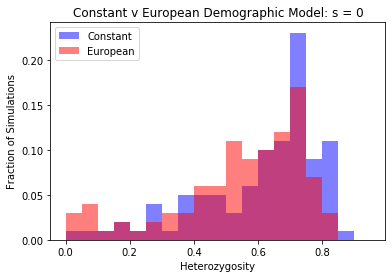

In [54]:
per = 2
opt_allele = 14
suffix_list = ['het', 'common']
s = 0

model = 'african'
model = '50k'
file_prefix = '/gymreklab-tscc/bonnieh/lrt/results/' + model + '/' + str(per) + '_' + str(opt_allele)
list_of_lists = GetAllLRTLists(file_prefix, suffix_list, s)
het_list_african = list_of_lists[0]


model = 'european'
file_prefix = '/gymreklab-tscc/bonnieh/lrt/results/' + model + '/' + str(per) + '_' + str(opt_allele) 
list_of_lists = GetAllLRTLists(file_prefix, suffix_list, s)
het_list_european = list_of_lists[0]

#bins = np.arange(0,max(het_list_african+het_list_european)+0.1,0.1) 
#bins = np.arange(0,weights=np.ones(len(het_list_european))/len(het_list_european),
plt.hist(het_list_african,bins = np.arange(0,max(het_list_african+het_list_european)+0.1,0.05) ,weights=np.ones(len(het_list_african))/len(het_list_african),color='blue',alpha = 0.5,label = 'Constant')
plt.hist(het_list_european,bins = np.arange(0,max(het_list_african+het_list_european)+0.1,0.05) , weights=np.ones(len(het_list_european))/len(het_list_european),color = 'red',alpha = 0.5,label = 'European')
plt.title('Constant v European Demographic Model: s = ' + str(s))
plt.xlabel('Heterozygosity')
#plt.xlabel('Number of common alleles')
plt.ylabel('Fraction of Simulations')
plt.legend()


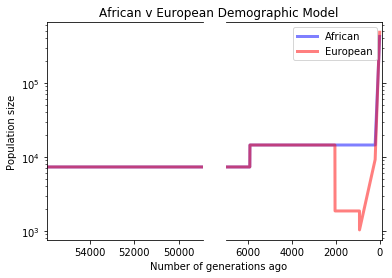

In [55]:
t = 0
N_e = 7310 # Starting effective population size
max_iter = 55920 # Number of generations
toplot_african = [] # Effective population size over time
toplot_european = []
while t < max_iter:
    if t == max_iter - 5920:
        N_e = 14474
    if t == max_iter - 2040:
        N_e = 1861  
    if t == max_iter - 920:
        N_e = 1032
    if t > max_iter - 920 and t < max_iter - 205:
        N_e = N_e * 1.00307
    if t >= max_iter - 205:
        N_e = N_e * 1.0195
            
    t = t + 1
        
    toplot_european.append(N_e)
    
t = 0
N_e = 7310
while t < max_iter:
    if t == max_iter - 5920:
        N_e = 14474
            
    if t >= max_iter - 205:
        N_e = N_e * 1.0166
    t = t + 1
        
    toplot_african.append(N_e)
    
        
x = np.r_[55919:54919:1, 6900:0:1]
    
fig,(ax,ax2) = plt.subplots(1, 2, sharey=True)
    
x = list(range(len(toplot_european)))
x.reverse()
toplot_european.reverse

# Plot data
ax.plot(x, toplot_african, label = 'African',alpha = 0.5, color = 'blue',lw=3)
ax2.plot(x, toplot_african, label = 'African',alpha = 0.5, color = 'blue',lw=3)
ax.plot(x, toplot_european, label = 'European',alpha = 0.5, color = 'red',lw=3)
ax2.plot(x, toplot_european, label = 'European',alpha = 0.5, color = 'red',lw=3)

ax.set_xlim(55920,48920) 
ax2.set_xlim(7000,-100) 
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.yaxis.tick_right()
ax.set_yscale('log')
plt.subplots_adjust(wspace=0.15)
ax.set_xlabel('Number of generations ago',x=1.1)
ax.set_ylabel('Population size')
ax.set_title('African v European Demographic Model',x=1.1)
plt.legend()
plt.show()